<a href="https://colab.research.google.com/github/jawherr/TP2RN/blob/main/Tp_2_R%C3%A9seau_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tp 2 IA: Réseau des neurones** 

> Réalisé par : Jawher Kallel - 3ING IDL2

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1:

In [90]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np

In [92]:
irisData = pd.read_csv("Iris.csv")

## Question 2:

In [93]:
print(irisData.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


## Question 3:

In [94]:
irisData.shape

(150, 6)

## Question 4:

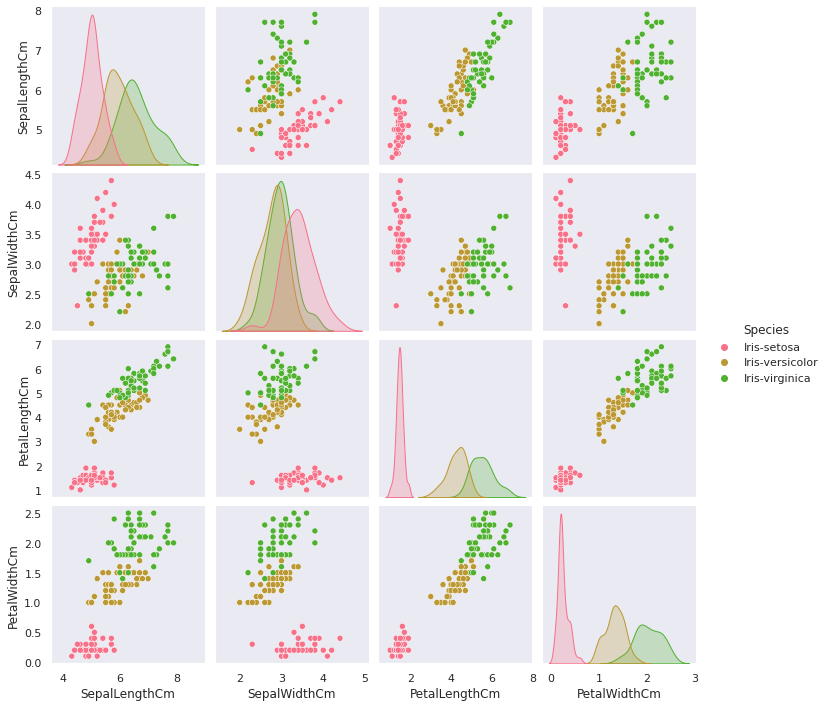

In [95]:
import seaborn as sns
sns.set_style(style="dark")
sns.set_palette("husl")
sns.pairplot(irisData.iloc[:,1:6], hue="Species")

##Question 5:

In [96]:
irisData.loc[irisData["Species"] == "Iris-setosa" , "Species"] = 0
irisData.loc[irisData["Species"] == "Iris-versicolor" , "Species"] = 1
irisData.loc[irisData["Species"] == "Iris-virginica" , "Species"] = 2

##Question 6:

In [98]:
print(irisData.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0
5   6            5.4           3.9            1.7           0.4       0
6   7            4.6           3.4            1.4           0.3       0
7   8            5.0           3.4            1.5           0.2       0
8   9            4.4           2.9            1.4           0.2       0
9  10            4.9           3.1            1.5           0.1       0


##Question 7:

In [99]:
from sklearn import model_selection
xData = irisData.iloc[:, 1:5].values
yData = irisData.iloc[:, 5].values
xTrain,xTest,yTrain,yTest=model_selection.train_test_split(xData, yData, test_size=0.3)

##Question 8:

In [100]:
print("10 premières données d’apprentissage (x):")
print(xTrain[0:10])
print("\n10 premières données de test (x):")
print(xTest[0:10])

10 premières données d’apprentissage (x):
[[4.6 3.1 1.5 0.2]
 [6.4 3.1 5.5 1.8]
 [5.3 3.7 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [5.  3.3 1.4 0.2]
 [4.9 2.4 3.3 1. ]
 [4.4 3.2 1.3 0.2]
 [6.8 2.8 4.8 1.4]]

10 premières données de test (x):
[[5.9 3.  4.2 1.5]
 [5.1 3.8 1.5 0.3]
 [6.4 2.8 5.6 2.2]
 [4.8 3.  1.4 0.3]
 [6.6 2.9 4.6 1.3]
 [5.  3.5 1.6 0.6]
 [4.8 3.4 1.6 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.5 2.5 4.  1.3]]


In [101]:
print("10 premières données d’apprentissage (y):")
print(yTrain[0:10])
print("\n10 premières données de test (y):")
print(yTest[0:10])

10 premières données d’apprentissage (y):
[0 2 0 0 1 2 0 1 0 1]

10 premières données de test (y):
[1 0 2 0 1 0 0 0 0 1]


##Question 9:

In [102]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), epsilon=0.07, max_iter=150)
clf.fit(xTrain, yTrain.astype('int'))

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')

##Question 10:

In [103]:
predict = clf.predict(xTest)
print(predict)

[1 0 2 0 1 0 0 0 0 1 0 2 1 1 2 2 0 1 1 0 0 2 1 0 2 1 1 2 2 2 1 1 2 1 2 2 2
 0 2 1 1 2 1 0 1]


In [104]:
print(yTest.astype('int'))

[1 0 2 0 1 0 0 0 0 1 0 2 1 1 1 2 0 1 1 0 0 2 1 0 2 1 1 2 2 2 1 1 2 1 2 2 2
 0 2 2 1 2 1 0 1]


In [105]:
from sklearn import metrics
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(predict,yTest.astype('int')))

The accuracy of the Multi-layer Perceptron is: 0.9555555555555556


##Question 11:

[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]


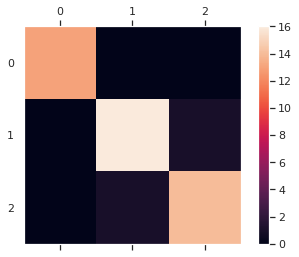

In [106]:
import matplotlib.pyplot as plt
import numpy
confMat =metrics.confusion_matrix(yTest.tolist(), predict.tolist())
figure = plt.figure()
xy = figure.add_subplot(111)
cxy = xy.matshow(confMat)
figure.colorbar(cxy)
print(confMat)
plt.show()

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

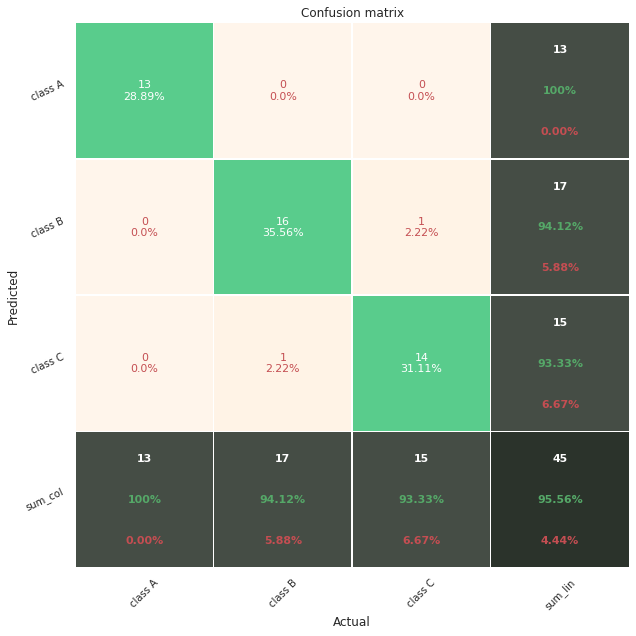

In [107]:
# deuxiéme bib pour la matrice de confusion
#!pip install pretty-confusion-matrix
from pretty_confusion_matrix import pp_matrix_from_data
test = numpy.array(yTest.tolist())
pred = numpy.array(predict.tolist())
pp_matrix_from_data(test, pred)

##Qustion 12:

In [108]:
print(metrics.classification_report(predict, yTest.astype('int')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Le modèle d'apprentissage se caractérise par une grande précision
 = **95,55 %**


* Pour les individus de classe 0 (Iris_Setosa), 13 sur 16 étaient bons.
* Pour les individus de classe 1 (Iris_Versicolor), 16 sur 16 ont été identifiés.
* Pour les individus de classe 2 (Iris_Virginica), 14 sur 16 ont été identifiés.

Le score de classification de chaque classe:

* Recall élevé pour toutes les classes
* Tous scores sont proches de 1

Alors notre perceptron est très efficace en précision et score.


##Question 13:

In [109]:
#Question 13
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate 0.2",
    "constant learning-rate 0.7",
    "inv-scaling learning-rate 0.2",
    "inv-scaling learning-rate 0.7",
    "adam 0.01",
]
plot_args =[
    {"c":"red", "linestyle":"-"},
    {"c":"green", "linestyle":"-"},
    {"c":"blue", "linestyle":"-"},
    {"c":"red", "linestyle":"--"},
    {"c":"green", "linestyle":"--"}
]

In [112]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
s=ss.fit(xTrain)
tS=s.transform(xTrain)
ttS=s.transform(xTest)

dc=[]
for i in range(len(params)):
  c = MLPClassifier(random_state=0, **params[i])
  c.fit(xTrain, yTrain.astype('int'))
  print(labels[i]," : ",c.score(xTrain, yTrain.astype('int')))
  dc.append(c)

constant learning-rate 0.2  :  0.3523809523809524
constant learning-rate 0.7  :  0.3523809523809524
inv-scaling learning-rate 0.2  :  0.9809523809523809
inv-scaling learning-rate 0.7  :  0.9714285714285714
adam 0.01  :  0.9904761904761905


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##Question 14:

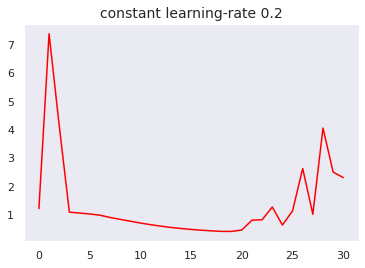

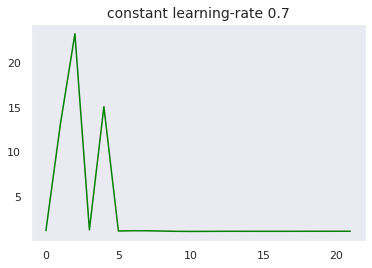

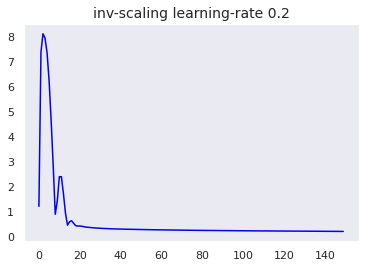

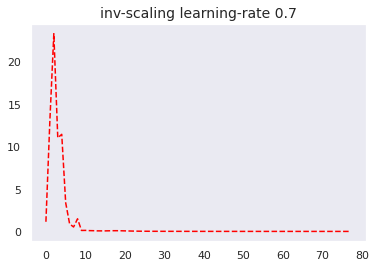

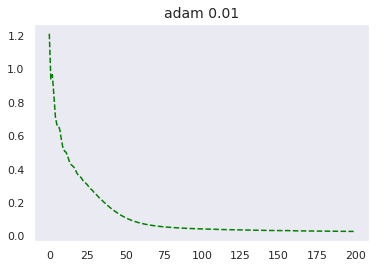

In [114]:
for i in range(len(dc)):
  plt.plot(dc[i].loss_curve_, **plot_args[i])
  plt.title(labels[i], fontsize=14)
  plt.show()

##Question 15:

In [126]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3),epsilon=0.07,max_iter=1500)
clf.fit(xTrain, yTrain.astype('int'))
predict = clf.predict(xTest)
print(predict)
print('La précision du Perceptron multicouche est: ',metrics.accuracy_score(predict,yTest.astype('int')))

[1 0 2 0 1 0 0 0 0 1 0 2 1 1 2 2 0 1 1 0 0 2 1 0 2 1 1 2 2 2 1 1 2 1 2 2 2
 0 2 2 1 2 1 0 1]
La précision du Perceptron multicouche est:  0.9777777777777777


In [117]:
print(metrics.classification_report(predict, yTest.astype('int')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.85      0.92        20
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



**La phénomène est overFitting :** 
L'overfitting est l'un des pires ennemis du Data Scientist. 
Il s'agit d'un problème fréquemment rencontré en Machine Learning. 
Il survient lorsque le modèle essaie de trop s'adapter aux données d'entraînement. 
Il est trop flexible et trop complexe et s'adapte à des données qui ne sont pas forcément à prendre en compte.

##Question 16:

In [128]:
from sklearn import preprocessing
from tensorflow import keras

lEncoder = preprocessing.LabelEncoder()
irisData['Species'] = lEncoder.fit_transform(irisData['Species'])
npIris = irisData.to_numpy()
xData = npIris[:,0:4]
yData=npIris[:,4]
scaler = StandardScaler().fit(xData)
xData = scaler.transform(xData)
yData = tf.keras.utils.to_categorical(yData,3)
xTrain,xTest,yTrain,yTest = model_selection.train_test_split(xData, yData, test_size=0.3)

NBCLASSE=3
md = tf.keras.models.Sequential()
md.add(keras.layers.Dense(128,                    
                             input_shape=(4,),      
                              name='Hidden-Layer-1', 
                              activation='relu'))
md.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))
md.add(keras.layers.Dense(NBCLASSE,
                             name='Output-Layer',
                             activation='softmax'))
md.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
print(md.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
6/6 [==============================] - 1s 38ms/step - loss: 0.9032 - accuracy: 0.7143 - val_loss: 0.6368 - val_accuracy: 0.8571
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6442 - accuracy: 0.8095 - val_loss: 0.4799 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5266 - accuracy: 0.8571 - val_loss: 0.3968 - val_accuracy: 0.9524
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.4660 - accuracy: 0.8333 - val_loss: 0.3243 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.4124 - accuracy: 0.8810 - val_loss: 0.2666 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3769 - accuracy: 0.8690 - val_loss: 0.2210 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3569 - accuracy: 0.8810 - val_loss: 0.1942 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

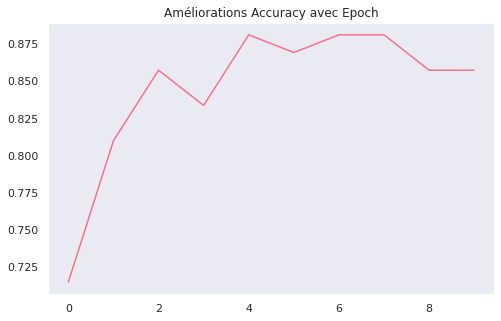

Évaluation par rapport à l'ensemble de données de test :
2/2 [==============================] - 0s 9ms/step - loss: 0.2618 - accuracy: 0.8889


[0.26180681586265564, 0.8888888955116272]

In [129]:
V=1
BSIZE=16
NBEPOCH=10
VALIDSPLIT=0.2

history=md.fit(xTrain,
          yTrain.astype('int'),
          batch_size=BSIZE,
          epochs=NBEPOCH,
          verbose=V,
          validation_split=VALIDSPLIT)

import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Améliorations Accuracy avec Epoch")
plt.show()

print("Évaluation par rapport à l'ensemble de données de test :")
md.evaluate(xTest,yTest)
     

Epoch 1/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3097 - accuracy: 0.8690 - val_loss: 0.1426 - val_accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2874 - accuracy: 0.8571 - val_loss: 0.1454 - val_accuracy: 0.9524
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2826 - accuracy: 0.8690 - val_loss: 0.1266 - val_accuracy: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2761 - accuracy: 0.8690 - val_loss: 0.1206 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2768 - accuracy: 0.8810 - val_loss: 0.1417 - val_accuracy: 0.9524
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2636 - accuracy: 0.8929 - val_loss: 0.1320 - val_accuracy: 0.9524
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2576 - accuracy: 0.8810 - val_loss: 0.1154 - val_accuracy: 1.0000
Epoch 8/100
6/6 [========

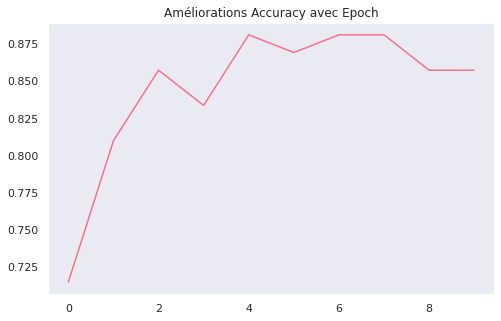

Évaluation par rapport à l'ensemble de données de test :
2/2 [==============================] - 0s 7ms/step - loss: 0.1975 - accuracy: 0.9111


[0.19753064215183258, 0.9111111164093018]

In [130]:
V=1
BSIZE=16
NBEPOCH=100
VALIDSPLIT=0.2
h=md.fit(xTrain,
          yTrain.astype('int'),
          batch_size=BSIZE,
          epochs=NBEPOCH,
          verbose=V,
          validation_split=VALIDSPLIT)
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Améliorations Accuracy avec Epoch")
plt.show()

print("Évaluation par rapport à l'ensemble de données de test :")
md.evaluate(xTest,yTest)   

In [131]:
#save model
md.save("irisSave")
loadModel = keras.models.load_model("irisSave")
loadModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [138]:
predicInput=[[5.2,3.4,1.4,0.2]]
sInput=scaler.transform(predicInput)
rawPredict=md.predict(sInput)
print("Sortie de prédiction brute (probabilités):" , rawPredict)
predict=np.argmax(rawPredict)
print("La prédiction est ", lEncoder.inverse_transform([predict]))

1/1 [==============================] - 0s 19ms/step
Sortie de prédiction brute (probabilités) : [[1.3762939e-02 9.8623705e-01 7.2822325e-34]]
Prediction is  [1]


In [139]:
predicInput=[[5.2,3.4,1.4,0.2]]
sInput=scaler.transform(predicInput)
rawPredict=md.predict(sInput)
print("Sortie de prédiction brute (probabilités):", rawPredict)
predict=np.argmax(rawPredict)
print("La prédiction est ", lEncoder.inverse_transform([predict]))

1/1 [==============================] - 0s 51ms/step
Sortie de prédiction brute (probabilités): [[1.3762939e-02 9.8623705e-01 7.2822325e-34]]
La prédiction est  [1]


**10 epoch :** perte : 0.2405 - précision : 0.8810 ; val_perte: 0.1159 - val_accuracy: 1.0000

**100 epoch :** perte : 0,1400 - précision : 0,9286 ; val_loss: 0.0691 - val_accuracy: 1.0000

La précision d'un modèle à 10 epoch est plus efficace qu'un modèle à 100 epoch

***D'après les deux courbes:***
    Le modèle a atteint une précision maximale à l'époque 7.
    Pour la deuxiéme courbe, on atteint 93% avec précision et perte = 0,3197, ce qui est mauvais à l'époque 100.

De cela, nous pouvons conclure que plusieurs tests avec différents paramètres doivent être effectués pour obtenir une précision maximale et une perte minimale.

##Question 17
Il est intéressant d'utiliser des modèles récursifs lorsque le problème dépend des conditions temporelles. Sinon, pour les IRIS à base statique, il n'y a pas d'évolution temporelle. Dans ce cas, il n'est pas logique d'utiliser un réseau de neurones récurrent sur l'ensemble des données.